## TODOs
- TODO: Think about adding Year control to raw estimates
- TODO: Need to drop `PurchaseWhat` for these regressions

In [1]:
import analyze
import prep
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%load_ext rpy2.ipython

%load_ext autoreload
%autoreload 2

/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:15: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [2]:
DATA_PATH = "../data/2020/survey_results_public.csv"
data_raw = pd.read_csv(DATA_PATH)
outcome = "DevType"
data_2020, keep, groups, categorical, numeric, base = prep.prep(data_raw, outcome, 2020)

DATA_PATH = "../data/2019/survey_results_public.csv"
data_raw = pd.read_csv(DATA_PATH)
data_2019, keep, groups, categorical, numeric, base = prep.prep(data_raw, outcome, 2019)

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Removing 26 respondents with missing DevType
6258 developers left in the sample after cleaning
151 or 2.4% black developers in the sample with multiracial replacement
Removing 87 respondents with missing DevType
12415 developers left in the sample after cleaning
288 or 2.3% black developers in the sample with multiracial replacement


In [3]:
data = pd.concat([data_2020, data_2019], axis=0)

In [4]:
data["Leader"] = data["DevType"].str.split(";").map(lambda x: ("Engineering manager" in x) | ("Senior executive/VP" in x))
data = data.drop(["DevType"], axis=1)

In [5]:
data["Leader"].value_counts() / len(data)

False    0.915654
True     0.084346
Name: Leader, dtype: float64

In [6]:
outcome = "Leader"
X, Y = prep.design_matrix(data, categorical, numeric, base, outcome)

Design matrix complete with 159 variables/columns


In [86]:
D = "Ethnicity"
results = analyze.analyze(Y, X, D)
results

,coef_ds,se_ds,t_ds,p_ds,lower_ds,upper_ds,coef_ols,se_ols,t_ols,p_ols,lower_ols,upper_ols
Ethnicity_Black_or_of_African_descent,0.005714,0.012544,0.455562,0.648705,-0.018871,0.030299,-0.016395,0.013423,-1.221419,0.221943,-0.042704,0.009915


In [17]:
D = "Ethnicity"
results = analyze.analyze(Y, X, D, logit = True)
results

Optimization terminated successfully.
         Current function value: 0.289215
         Iterations 7


,coef_ds,se_ds,t_ds,p_ds,lower_ds,upper_ds,coef_raw,se_raw,t_raw,p_raw,lower_raw,upper_raw
Ethnicity_Black_or_of_African_descent,0.116998,0.203086,0.576102,0.564546,-0.281068,0.515064,-0.232911,0.191013,-1.21935,0.222711,-0.607289,0.141467


In [18]:
import statsmodels.api as sm

In [157]:
model = sm.Logit(endog=Y, exog=X.drop([col for col in X.columns if D in col] + [col for col in X.columns if "PurchaseWhat" in col], axis=1).assign(const=1)).fit()

Optimization terminated successfully.
         Current function value: 0.231134
         Iterations 9


In [164]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Leader   No. Observations:                18673
Model:                          Logit   Df Residuals:                    18518
Method:                           MLE   Df Model:                          154
Date:                Tue, 21 Jul 2020   Pseudo R-squ.:                  0.2009
Time:                        08:57:53   Log-Likelihood:                -4316.0
converged:                       True   LL-Null:                       -5401.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================================================================
                                                                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------
Age                                                                                    0.1577      0.095      1.660      0.097      -0.029       0.344
YearsCode                                                                              0.0896      0.042      2.111      0.035       0.006       0.173
YearsCodePro                                                                           0.3349      0.040      8.425      0.000       0.257       0.413
Hobbyist_Yes                                                                           0.0532      0.079      0.672      0.502      -0.102       0.208
DatabaseWorkedWith_Cassandra                                                          -0.1212      0.148     -0.821      0.412      -0.410       0.168
DatabaseWorkedWith_Couchbase                                                          -0.1554      0.175     -0.886      0.375      -0.499       0.188
DatabaseWorkedWith_DynamoDB                                                            0.2053      0.089      2.318      0.020       0.032       0.379
DatabaseWorkedWith_Elasticsearch                                                       0.0948      0.076      1.249      0.212      -0.054       0.244
DatabaseWorkedWith_Firebase                                                            0.2247      0.103      2.173      0.030       0.022       0.427
DatabaseWorkedWith_IBM_DB2                                                            -0.6781      0.410     -1.654      0.098      -1.481       0.125
DatabaseWorkedWith_MariaDB                                                            -0.1934      0.095     -2.032      0.042      -0.380      -0.007
DatabaseWorkedWith_Microsoft_SQL_Server                                                0.1401      0.089      1.570      0.117      -0.035       0.315
DatabaseWorkedWith_MongoDB                                                             0.1670      0.074      2.257      0.024       0.022       0.312
DatabaseWorkedWith_No_answer                                                          -0.0019      0.144     -0.013      0.989      -0.285       0.281
DatabaseWorkedWith_Oracle                                                             -0.2982      0.109     -2.737      0.006      -0.512      -0.085
DatabaseWorkedWith_Others                                                              0.1303      0.129      1.007      0.314      -0.123       0.384
DatabaseWorkedWith_PostgreSQL                                                          0.0927      0.070      1.327      0.184      -0.044       0.230
DatabaseWorkedWith_Redis                                                               0.4795      0.070      6.862      0.000       0.343       0.617
DatabaseWorkedWith_SQLite                                             

In [82]:
Y.reset_index(drop=True)[pd.concat([Y.reset_index(drop=True), pd.Series(model.predict(), name="Pred")], axis=1)["Pred"] <= 0.03299].value_counts()

0.0    9225
1.0     111
Name: Leader, dtype: int64

In [83]:
Y.reset_index(drop=True)[pd.concat([Y.reset_index(drop=True), pd.Series(model.predict(), name="Pred")], axis=1)["Pred"] > 0.03299].value_counts()

0.0    7873
1.0    1464
Name: Leader, dtype: int64

In [160]:
predictions = pd.Series(model.predict())

In [161]:
X_q = {}
Y_q = {}
quantiles = 10

for q in range(1, quantiles+1):
    X_q[q] = X.reset_index(drop=True).loc[(predictions <= predictions.quantile(q/quantiles)) & (predictions > predictions.quantile(q/quantiles-(1/quantiles)))]
    Y_q[q] = Y.reset_index(drop=True).loc[(predictions <= predictions.quantile(q/quantiles)) & (predictions > predictions.quantile(q/quantiles-(1/quantiles)))]
    #Y_q[q] = predictions.loc[(predictions <= predictions.quantile(q/quantiles)) & (predictions > predictions.quantile(q/quantiles-(1/quantiles)))]

In [162]:
D = "Ethnicity"
start_q = 5
results_q = []
for q in range(start_q, quantiles+1):
    print(q)
    results_q.append(analyze.analyze(Y_q[q], X_q[q], D, logit=True))
    
results_q = pd.concat(results_q, axis=0)
results_q.index = range(start_q, quantiles+1)

5
         Current function value: 0.158823
         Iterations: 35
6


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.206997
         Iterations 7
7
Optimization terminated successfully.
         Current function value: 0.277598
         Iterations 6
8
Optimization terminated successfully.
         Current function value: 0.357092
         Iterations 6
9
Optimization terminated successfully.
         Current function value: 0.437555
         Iterations 6
10
Optimization terminated successfully.
         Current function value: 0.648138
         Iterations 4


In [163]:
results_q

,coef_ds,se_ds,t_ds,p_ds,lower_ds,upper_ds,coef_raw,se_raw,t_raw,p_raw,lower_raw,upper_raw
5,-14.325325,201382.546045,-0.000071,0.999943,-394972.909080,394944.258429,-17.947890,5700.334264,-0.003149,0.997488,-11190.397747,11154.501967
6,0.399646,0.541455,0.738096,0.460456,-0.662276,1.461568,0.413987,0.531133,0.779441,0.435720,-0.627015,1.454989
7,-0.107245,0.752401,-0.142538,0.886655,-1.582880,1.368390,-0.026386,0.742986,-0.035514,0.971670,-1.482611,1.429839
8,0.199275,0.497402,0.400631,0.688691,-0.776247,1.174797,0.152632,0.485543,0.314354,0.753252,-0.799014,1.104279
9,0.617753,0.447038,1.381882,0.167008,-0.258993,1.494500,0.410503,0.432698,0.948706,0.342770,-0.437570,1.258576
10,0.349125,0.400416,0.871906,0.383260,-0.436185,1.134434,-0.034689,0.375424,-0.092400,0.926380,-0.770506,0.701128


In [137]:
results_q

,coef_ds,se_ds,t_ds,p_ds,lower_ds,upper_ds,coef_raw,se_raw,t_raw,p_raw,lower_raw,upper_raw
5,0.457781,0.729556,0.627479,0.530345,-0.973051,1.888613,0.495804,0.737645,0.672144,0.501492,-0.949954,1.941562
6,-0.488632,1.039147,-0.470224,0.638195,-2.526646,1.549381,-0.511416,1.019764,-0.501505,0.616016,-2.510117,1.487284
7,0.778450,0.483766,1.609147,0.107584,-0.170328,1.727228,0.760377,0.489314,1.553964,0.120193,-0.198662,1.719415
8,-0.328188,0.611383,-0.536797,0.591408,-1.527255,0.870878,-0.363686,0.605466,-0.600671,0.548059,-1.550377,0.823005
9,0.220700,0.402360,0.548514,0.583339,-0.568423,1.009823,0.194483,0.401759,0.484080,0.628329,-0.592949,0.981916
10,0.504938,0.488041,1.034623,0.300845,-0.452225,1.462101,0.631409,0.451997,1.396933,0.162434,-0.254488,1.517306


In [91]:
results_q

,coef_ds,se_ds,t_ds,p_ds,lower_ds,upper_ds,coef_raw,se_raw,t_raw,p_raw,lower_raw,upper_raw
1,-0.001497,0.005955,-0.251332,0.801557,-0.013168,0.010175,-0.002263,0.005930,-0.381628,0.702781,-0.013894,0.009368
2,-0.003400,0.009219,-0.368797,0.712279,-0.021469,0.014669,-0.006162,0.009144,-0.673905,0.500455,-0.024095,0.011771
3,-0.004739,0.012006,-0.394686,0.693075,-0.028271,0.018793,-0.006190,0.011975,-0.516907,0.605282,-0.029675,0.017295
4,-0.009903,0.022822,-0.433903,0.664359,-0.054634,0.034828,-0.020582,0.022864,-0.900185,0.368138,-0.065424,0.024260
5,0.019070,0.022859,0.834223,0.404155,-0.025734,0.063873,0.015553,0.022929,0.678313,0.497657,-0.029416,0.060523
6,-0.014319,0.031908,-0.448741,0.653618,-0.076857,0.048220,-0.016004,0.031805,-0.503192,0.614889,-0.078382,0.046373
7,0.070911,0.041214,1.720550,0.085333,-0.009867,0.151690,0.065433,0.041135,1.590691,0.111849,-0.015242,0.146107
8,-0.029487,0.048590,-0.606864,0.543941,-0.124721,0.065746,-0.029446,0.048599,-0.605893,0.544659,-0.124759,0.065868
9,0.033459,0.062146,0.538399,0.590302,-0.088344,0.155263,0.029902,0.061838,0.483561,0.628754,-0.091377,0.151181
10,0.163841,0.109466,1.496735,0.134462,-0.050708,0.378390,0.156050,0.109962,1.419122,0.156031,-0.059612,0.371712


In [13]:
data.groupby(["Ethnicity"]).mean()

,Age,YearsCode,YearsCodePro,Leader
Ethnicity,,,,
Black or of African descent,31.485194,11.719818,7.356492,0.068337
Other,33.535774,15.045355,9.684655,0.084732


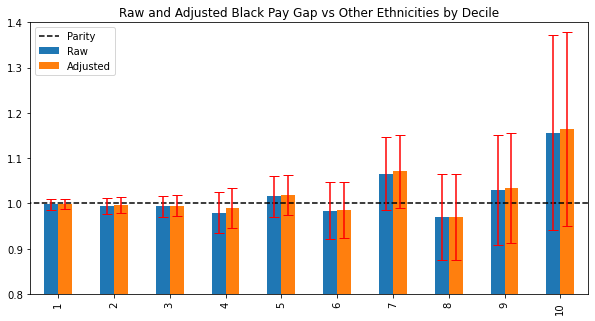

In [95]:
(results_q[["coef_raw", "coef_ds"]] + 1).plot(kind="bar", figsize=(10,5))
plt.ylim(0.8, 1.4)
plt.title("Raw and Adjusted Black Leadership Gap vs Other Ethnicities by Decile")
plt.hlines(1, -1, quantiles, linestyles="--")
plt.legend(["Parity", "Raw", "Adjusted"])
plt.errorbar(x=[i - 0.125 for i in range(start_q, quantiles)], y=[1] * quantiles, yerr=abs(results_q[["lower_raw", "upper_raw"]]).T.values, fmt="none", color="red", capsize=5)
plt.errorbar(x=[i + 0.125 for i in range(start_q, quantiles)], y=[1] * quantiles, yerr=abs(results_q[["lower_ds", "upper_ds"]]).T.values, fmt="none", color="red", capsize=5)
plt.show()

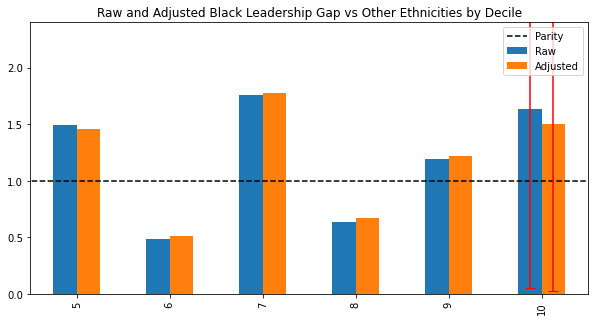

In [155]:
(results_q[["coef_raw", "coef_ds"]] + 1).plot(kind="bar", figsize=(10,5))
plt.ylim(0, 2.4)
plt.title("Raw and Adjusted Black Leadership Gap vs Other Ethnicities by Decile")
plt.hlines(1, -1, quantiles, linestyles="--")
plt.legend(["Parity", "Raw", "Adjusted"])
plt.errorbar(x=[i - 0.125 for i in range(start_q, quantiles+1)], y=[1] * (quantiles - start_q + 1), yerr=abs(results_q[["lower_raw", "upper_raw"]]).T.values, fmt="none", color="red", capsize=5)
plt.errorbar(x=[i + 0.125 for i in range(start_q, quantiles+1)], y=[1] * (quantiles - start_q + 1), yerr=abs(results_q[["lower_ds", "upper_ds"]]).T.values, fmt="none", color="red", capsize=5)
plt.show()